<a href="https://colab.research.google.com/github/GGMmattos/Machine-Learning-And-Data-Science/blob/main/Prevendo_o_Sal%C3%A1rio_com_Base_nas_Horas_de_Estudo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problema de negócio

Este projeto busca prever o salário de determinado indivíduo tendo como base a quantidade de hora de estudo que o mesmo realizou por mês.

In [ ]:
#import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Carregamento dos dados

In [ ]:
data_frame = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Curso DSA/Projetos/arquivos/dataset.csv')

Verificando a quantidade de linhas e colunas do dataset

In [ ]:
data_frame.shape

(500, 2)

Verificando as colunas presente na base

In [ ]:
data_frame.columns

Index(['horas_estudo_mes', 'salario'], dtype='object')

In [ ]:
data_frame.head()

,horas_estudo_mes,salario
0,57.0,6813.0
1,48.0,6855.0
2,60.0,5801.0
3,73.0,7431.0
4,46.0,5475.0


Executando o comando a baixo é possível verificar que o dataset não possui valores nulos, e que esses valor são do tipo ponto flutuante (float).

Caso apresentasse valores nulos os mesmo teriam que ser tratados.

In [ ]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   horas_estudo_mes  500 non-null    float64
 1   salario           500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


# Análise Exploratória - Resumo Estatístico

In [ ]:
#Verifica se há valores ausentes
data_frame.isnull().sum()

,0
horas_estudo_mes,0
salario,0


Com o coeficiente de correlação é um coeficiente que vai de -1 a +1, sendo que, próximo de -1 forte correlação negativa, próximo de +1 forte correlação positiva e 0 correspode a não correlação entre as variáveis

In [ ]:
#Correlação
data_frame.corr()

,horas_estudo_mes,salario
horas_estudo_mes,1.000000,0.818576
salario,0.818576,1.000000


variável horas_estudo_mes
Variável alvo: salario

Neste problema a variável de entrada e a horas de estudo ao mês e a de saída o salário, por meio da tabela gerada a abaixo podemos ver a forte correlação positiva, ou seja, quanto maior a hora de estudo ao mês maior o salário do indivíduo.

In [ ]:
#Resumo estatistico do dataset
data_frame.describe()

,horas_estudo_mes,salario
count,500.000000,500.000000
mean,50.060000,6018.930000
std,14.659406,848.697853
min,1.000000,3664.000000
25%,39.750000,5473.000000
50%,50.000000,6013.500000
75%,60.000000,6542.000000
max,100.000000,9348.000000


In [ ]:
#Resumo estatistico da variável preditora
data_frame['horas_estudo_mes'].describe()

,horas_estudo_mes
count,500.000000
mean,50.060000
std,14.659406
min,1.000000
25%,39.750000
50%,50.000000
75%,60.000000
max,100.000000


<Axes: xlabel='horas_estudo_mes', ylabel='Count'>

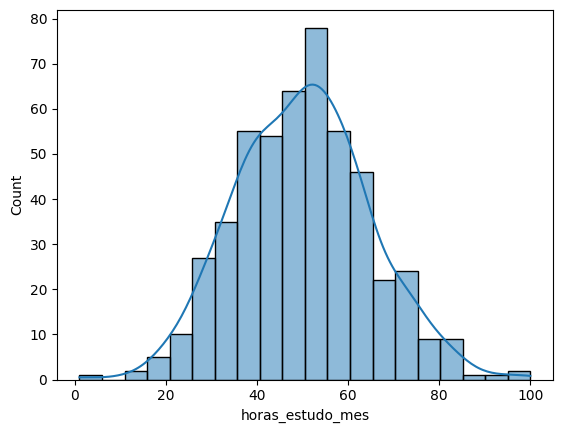

In [ ]:
#Histograma da variável preditora
sns.histplot(data = data_frame, x = "horas_estudo_mes", kde = True)